In [ ]:
import numpy as np
wt = np.array([0.5,-0.5])
lr = 0.05
inputs = np.array([0.1,0.1])
target = 1
output = 0.5
error = target - output
hebbian = wt + lr*np.outer(inputs,inputs)
perceptron = wt + lr*(target - output)*inputs
delta = wt + lr*error*inputs
correlation = wt + lr*target*inputs
outstar = wt + lr*error
print("Hebbian learning rule: ",hebbian)
print("Perceptron learning rule: ",perceptron)
print("Delta learning rule: ",delta)
print("Correlation learning rule: ",correlation)
print("Outstar learning rule: ",outstar)

Hebbian learning rule:  [[ 0.5005 -0.4995]
 [ 0.5005 -0.4995]]
Perceptron learning rule:  [ 0.5025 -0.4975]
Delta learning rule:  [ 0.5025 -0.4975]
Correlation learning rule:  [ 0.505 -0.495]
Outstar learning rule:  [ 0.525 -0.475]


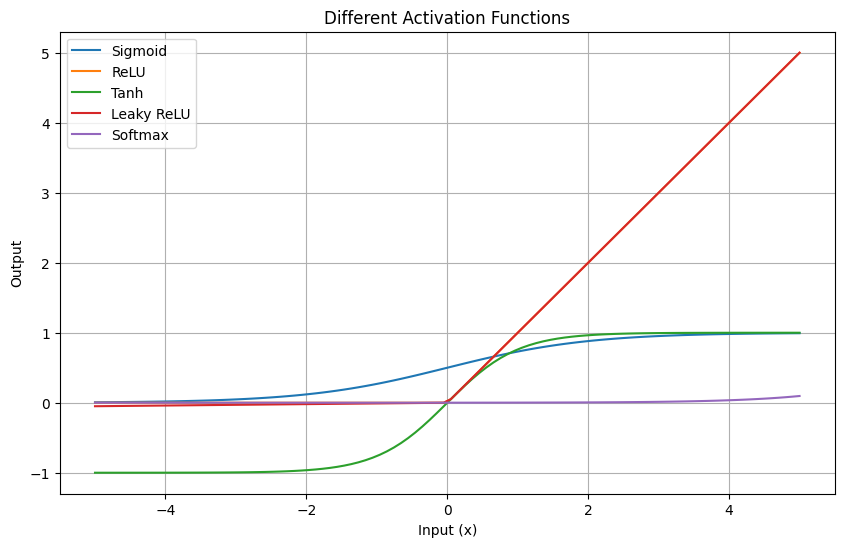

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def relu(x):
  return np.maximum(0, x)

def tanh(x):
  return np.tanh(x)

def leaky_relu(x, alpha=0.01):
  return np.maximum(alpha * x, x)

def softmax(x):
  exp_x = np.exp(x - np.max(x))
  return exp_x / exp_x.sum()

x = np.linspace(-5, 5, 100)

sigmoid_y = sigmoid(x)
relu_y = relu(x)
tanh_y = tanh(x)
leaky_relu_y = leaky_relu(x)
softmax_y = softmax(x)

plt.figure(figsize=(10, 6))
plt.plot(x, sigmoid_y, label='Sigmoid')
plt.plot(x, relu_y, label='ReLU')
plt.plot(x, tanh_y, label='Tanh')
plt.plot(x, leaky_relu_y, label='Leaky ReLU')
plt.plot(x, softmax_y, label='Softmax')

plt.xlabel('Input (x)')
plt.ylabel('Output')
plt.title('Different Activation Functions')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
"""Implement a python program for perceptron networks by considering the given scenario
A student wants to make a decision whether to go for a movie or not while looking at 3 parameters, the 3 inputs are fav hero, fav heroine, climate and each has weight and bias
weights = 0.2,0.4,0.2 and bias is -0.5. Calculate the accuracy where if output = 1, means going to movie"""
import numpy as np

def predict(inputs, weights, bias):
  linear_combination = np.dot(inputs, weights) + bias
  return 1 if linear_combination >= 0 else 0

def calculate_accuracy(inputs, targets, weights, bias):
  correct_predictions = 0
  for i in range(len(inputs)):
    prediction = predict(inputs[i], weights, bias)
    if prediction == targets[i]:
      correct_predictions += 1
  return correct_predictions / len(inputs)


inputs = np.array([
    [1, 1, 1],
    [0, 1, 1],
    [1, 0, 0],
    [0, 0, 0]
])
targets = np.array([1, 1, 0, 0])
weights = np.array([0.2, 0.4, 0.2])
bias = -0.5

accuracy = calculate_accuracy(inputs, targets, weights, bias)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


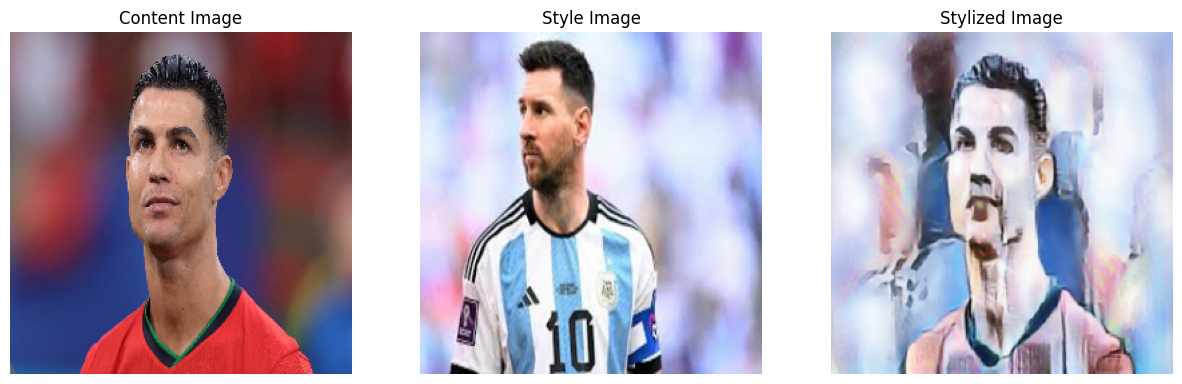

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_hub as hub

model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")

def preprocess_image(image_path):
  image = tf.image.decode_image(tf.io.read_file(image_path),channels = 3)
  image = tf.image.convert_image_dtype(image,tf.float32)
  image = tf.image.resize(image,[256,256])
  image = image[tf.newaxis, :]
  return image

def style_transfer(content_image, style_image):
  stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]
  return stylized_image

content_image_path = '/content/ronaldo.jpg'
style_image_path = '/content/messi.jpeg'

content_image = preprocess_image(content_image_path)
style_image = preprocess_image(style_image_path)

stylized_image = style_transfer(content_image, style_image)

plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(np.squeeze(content_image))
plt.title("Content Image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(np.squeeze(style_image))
plt.title("Style Image")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(np.squeeze(stylized_image))
plt.title("Stylized Image")
plt.axis('off')
plt.show()

In [ ]:
#write
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 61s 130ms/step - accuracy: 0.7732 - loss: 0.7534 - val_accuracy: 0.9782 - val_loss: 0.0836
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 90ms/step - accuracy: 0.9619 - loss: 0.1259 - val_accuracy: 0.9852 - val_loss: 0.0601
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 89ms/step - accuracy: 0.9729 - loss: 0.0918 - val_accuracy: 0.9880 - val_loss: 0.0468
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 91ms/step - accuracy: 0.9770 - loss: 0.0752 - val_accuracy: 0.9897 - val_loss: 0.0408
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 92ms/step - accuracy: 0.9807 - loss: 0.0630 - val_accuracy: 0.9898 - val_loss: 0.0381
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 90ms/step - accuracy: 0.9816 - loss: 0.0571 - val_accuracy: 0.9892 - val_loss: 0.0376
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 45s 100ms/step - accuracy: 0.9838 - loss: 0.0515 - val_accuracy: 0.9893 - val_loss: 0.0372
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━

In [ ]:
# prompt: debugging gradient descent with gradient checking in neural networks

import numpy as np

def gradient_check(f, x, epsilon=1e-7):
    """
    Performs gradient checking on a function f at a given point x.

    Args:
        f: The function to check. It should take a numpy array as input and return a scalar value.
        x: The point at which to perform gradient checking.
        epsilon: A small value used to approximate the gradient.

    Returns:
        A tuple containing the approximate gradient and the analytical gradient.
    """

    analytical_grad = f(x) # Assuming f returns the gradient directly
    approx_grad = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        ix = it.multi_index
        old_val = x[ix]

        x[ix] = old_val + epsilon
        fx_plus = f(x) # Assuming f returns the objective function value

        x[ix] = old_val - epsilon
        fx_minus = f(x) # Assuming f returns the objective function value

        x[ix] = old_val # Restore the original value

        approx_grad[ix] = (fx_plus - fx_minus) / (2 * epsilon)
        it.iternext()

    return approx_grad, analytical_grad

# Example usage:
# Define your function and its gradient
# Replace this with your actual function and its gradient
def my_function(x):
    return x**2  # Example function: f(x) = x^2


def my_gradient(x):
    return 2*x # Example gradient: f'(x) = 2x

x_test = np.array([2.0]) # Test input
numerical_grad, analytical_grad = gradient_check(my_gradient, x_test)

print(f"Numerical Gradient: {numerical_grad}")
print(f"Analytical Gradient: {analytical_grad}")


# Compare the numerical and analytical gradients
diff = np.linalg.norm(numerical_grad - analytical_grad) / (np.linalg.norm(numerical_grad) + np.linalg.norm(analytical_grad))
print(f"Relative difference: {diff}")

# Check if the difference is within a tolerance
threshold = 1e-7 # Set your desired tolerance
if diff < threshold:
  print("Gradient check passed!")
else:
  print("Gradient check failed!")


Numerical Gradient: [2.]
Analytical Gradient: [4.]
Relative difference: 0.33333333356726924
Gradient check failed!


<ipython-input-1-6b406ad18563>:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  approx_grad[ix] = (fx_plus - fx_minus) / (2 * epsilon)


In [ ]:
# prompt: implement l2 regularization in neural network to prevent overfitting

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# --- L2 Regularization in the MNIST Model ---
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)), #L2 regularization added here
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)), #L2 regularization added here
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax", kernel_regularizer=keras.regularizers.l2(0.001)) #L2 regularization added here
    ]
)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 48s 110ms/step - accuracy: 0.7571 - loss: 0.8612 - val_accuracy: 0.9778 - val_loss: 0.1708
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 76s 96ms/step - accuracy: 0.9612 - loss: 0.2084 - val_accuracy: 0.9793 - val_loss: 0.1431
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 96ms/step - accuracy: 0.9695 - loss: 0.1760 - val_accuracy: 0.9843 - val_loss: 0.1299
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 96ms/step - accuracy: 0.9719 - loss: 0.1600 - val_accuracy: 0.9870 - val_loss: 0.1238
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 99ms/step - accuracy: 0.9755 - loss: 0.1512 - val_accuracy: 0.9847 - val_loss: 0.1282
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 96ms/step - accuracy: 0.9761 - loss: 0.1465 - val_accuracy: 0.9873 - val_loss: 0.1151
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 95ms/step - accuracy: 0.9768 - loss: 0.1450 - val_accuracy: 0.9855 - val_loss: 0.1169
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)


svm_model = keras.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(10, activation='linear')
])

svm_model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalHinge(),
              metrics=['accuracy'])

svm_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))



softmax_model = keras.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(10, activation='softmax')
])

softmax_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

softmax_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))


svm_loss, svm_accuracy = svm_model.evaluate(x_test, y_test, verbose=0)
softmax_loss, softmax_accuracy = softmax_model.evaluate(x_test, y_test, verbose=0)

print(f"SVM Test Loss: {svm_loss:.4f}")
print(f"SVM Test Accuracy: {svm_accuracy:.4f}")
print(f"Softmax Test Loss: {softmax_loss:.4f}")
print(f"Softmax Test Accuracy: {softmax_accuracy:.4f}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2384 - loss: 1.4500 - val_accuracy: 0.3123 - val_loss: 1.2059
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3126 - loss: 1.2457 - val_accuracy: 0.3077 - val_loss: 1.2102
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3355 - loss: 1.2236 - val_accuracy: 0.3207 - val_loss: 1.2233
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3330 - loss: 1.2435 - val_accuracy: 0.2883 - val_loss: 1.4435
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3421 - loss: 1.2422 - val_accuracy: 0.2859 - val_loss: 1.3666
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3430 - loss: 1.2367 - val_accuracy: 0.2958 - val_loss: 1.3527
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3534 - loss: 1.2405 - val_accuracy: 0.3122 - val_loss: 1.2972
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3574 - loss: 1.2184 - val_accuracy: 0.

In [ ]:
#do not write
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

def build_alexnet(input_shape=(227, 227, 3), num_classes=1000):
  model = Sequential()

  # 1st Convolutional Layer
  model.add(Conv2D(96, kernel_size=(11, 11), strides=4, activation='relu', input_shape=input_shape))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(3, 3), strides=2))

  # 2nd Convolutional Layer
  model.add(Conv2D(256, kernel_size=(5, 5), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(3, 3), strides=2))

  # 3rd Convolutional Layer
  model.add(Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  # 4th Convolutional Layer
  model.add(Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  # 5th Convolutional Layer
  model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(3, 3), strides=2))

  # Flatten the output
  model.add(Flatten())

  # 1st Dense Layer
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))

  # 2nd Dense Layer
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))

  # Output Layer
  model.add(Dense(num_classes, activation='softmax'))

  return model

# Create an instance of the AlexNet model
model = build_alexnet()

# Print the model summary
model.summary()

In [ ]:
!wget 'https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg'
!wget 'https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names'

--2025-05-14 14:22:21--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2025-05-14 14:22:21 (34.9 MB/s) - ‘yolov3.cfg’ saved [8342/8342]

--2025-05-14 14:22:21--  https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625 [text/plain]
Saving to: ‘coco.names’

coco

In [ ]:
!wget 'https://huggingface.co/spaces/Epitech/Scarecrow/resolve/main/yolov3.weights'

--2025-05-14 14:30:01--  https://huggingface.co/spaces/Epitech/Scarecrow/resolve/main/yolov3.weights
Resolving huggingface.co (huggingface.co)... 18.239.50.49, 18.239.50.16, 18.239.50.80, ...
Connecting to huggingface.co (huggingface.co)|18.239.50.49|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.hf.co/repos/14/57/14571eca31b1ee9ee3c563de4f67e0507916a1cebc8a22be13cdd0ee185b4fc5/523e4e69e1d015393a1b0a441cef1d9c7659e3eb2d7e15f793f060a21b32f297?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27yolov3.weights%3B+filename%3D%22yolov3.weights%22%3B&Expires=1747236601&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc0NzIzNjYwMX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9yZXBvcy8xNC81Ny8xNDU3MWVjYTMxYjFlZTllZTNjNTYzZGU0ZjY3ZTA1MDc5MTZhMWNlYmM4YTIyYmUxM2NkZDBlZTE4NWI0ZmM1LzUyM2U0ZTY5ZTFkMDE1MzkzYTFiMGE0NDFjZWYxZDljNzY1OWUzZWIyZDdlMTVmNzkzZjA2MGEyMWIzMmYyOTc%7EcmVzcG9uc2UtY29udGVudC1kaXNwb3N

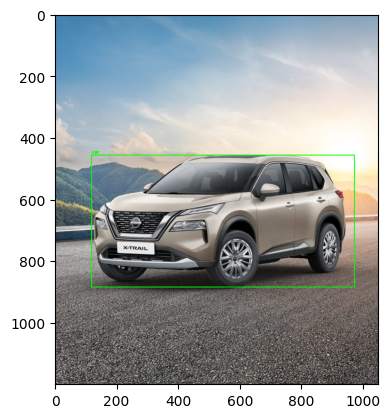

car


In [ ]:
# prompt: To implement the YOLO model for detecting objects in images from the COCO dataset

import numpy as np
!pip install opencv-python
import cv2
import matplotlib.pyplot as plt

# Load YOLOv3 weights and configuration
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg") # Replace with actual paths if different

# Load COCO class labels
classes = []
with open("coco.names", "r") as f: # Replace with actual path if different
    classes = [line.strip() for line in f.readlines()]

# Get output layer names
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Load the input image
image = cv2.imread("/content/image.jpg") # Replace with your image path
height, width, channels = image.shape

# Prepare input blob for the network
blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)

# Run forward pass through the network
outs = net.forward(output_layers)

# Process the outputs
class_ids = []
confidences = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Apply non-maximum suppression (NMS) to remove overlapping boxes
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)


# Draw bounding boxes and labels on the image
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, label, (x, y - 5), font, 1, (0, 255, 0), 2)

# Display the output image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
print(label)


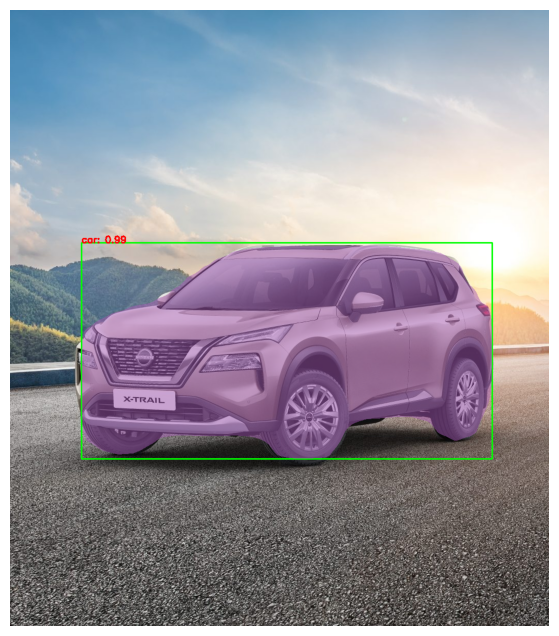

In [ ]:
# Step 1: Install required packages
!pip install -q torchvision matplotlib

# Step 2: Import necessary libraries
import torch
import torchvision
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
from google.colab import files

with open("coco.names", "r") as f:
    COCO_INSTANCE_CATEGORY_NAMES = [line.strip() for line in f.readlines()]


# Step 4: Load the pre-trained Mask R-CNN model
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Step 5: Load and preprocess the image
def load_image(image_path):
    image = Image.open(image_path).convert("RGB")
    image_tensor = F.to_tensor(image).to(device)
    return image, image_tensor

# Step 6: Inference and visualization with labels
def detect_and_segment(image_path, threshold=0.5):
    image, image_tensor = load_image(image_path)

    with torch.no_grad():
        prediction = model([image_tensor])[0]

    img_cv = np.array(image)
    img_cv = cv2.cvtColor(img_cv, cv2.COLOR_RGB2BGR)

    for i in range(len(prediction["scores"])):
        if prediction["scores"][i] >= threshold:
            box = prediction["boxes"][i].cpu().numpy().astype(int)
            label_id = prediction["labels"][i].item()
            label_name = COCO_INSTANCE_CATEGORY_NAMES[label_id - 1]
            score = prediction["scores"][i].item()

            # Draw bounding box and label
            cv2.rectangle(img_cv, tuple(box[:2]), tuple(box[2:]), (0, 255, 0), 2)
            cv2.putText(img_cv, f"{label_name}: {score:.2f}", tuple(box[:2]),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

            # Draw segmentation mask
            mask = prediction["masks"][i, 0].cpu().numpy()
            mask = (mask > 0.5).astype(np.uint8)
            color_mask = np.random.randint(0, 255, (1, 3), dtype=np.uint8)
            img_cv[mask == 1] = img_cv[mask == 1] * 0.5 + color_mask * 0.5

    img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12, 8))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

# Step 7: Upload and process your image
'''print("Upload an image file")
uploaded = files.upload()
image_path = list(uploaded.keys())[0]'''
detect_and_segment("/content/image.jpg")


100%|██████████| 9.91M/9.91M [00:00<00:00, 11.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 339kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.17MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.67MB/s]



Training Baseline model...
Epoch 1/10 | Train Loss: 0.3451, Test Accuracy: 0.9338
Epoch 2/10 | Train Loss: 0.1539, Test Accuracy: 0.9620
Epoch 3/10 | Train Loss: 0.1133, Test Accuracy: 0.9692
Epoch 4/10 | Train Loss: 0.0924, Test Accuracy: 0.9715
Epoch 5/10 | Train Loss: 0.0797, Test Accuracy: 0.9671
Epoch 6/10 | Train Loss: 0.0692, Test Accuracy: 0.9662
Epoch 7/10 | Train Loss: 0.0611, Test Accuracy: 0.9756
Epoch 8/10 | Train Loss: 0.0527, Test Accuracy: 0.9736
Epoch 9/10 | Train Loss: 0.0497, Test Accuracy: 0.9771
Epoch 10/10 | Train Loss: 0.0432, Test Accuracy: 0.9779

Training Dropout model...
Epoch 1/10 | Train Loss: 0.6120, Test Accuracy: 0.9298
Epoch 2/10 | Train Loss: 0.3570, Test Accuracy: 0.9459
Epoch 3/10 | Train Loss: 0.3156, Test Accuracy: 0.9494
Epoch 4/10 | Train Loss: 0.2872, Test Accuracy: 0.9536
Epoch 5/10 | Train Loss: 0.2730, Test Accuracy: 0.9579
Epoch 6/10 | Train Loss: 0.2567, Test Accuracy: 0.9561
Epoch 7/10 | Train Loss: 0.2507, Test Accuracy: 0.9574
Epoch 8/1

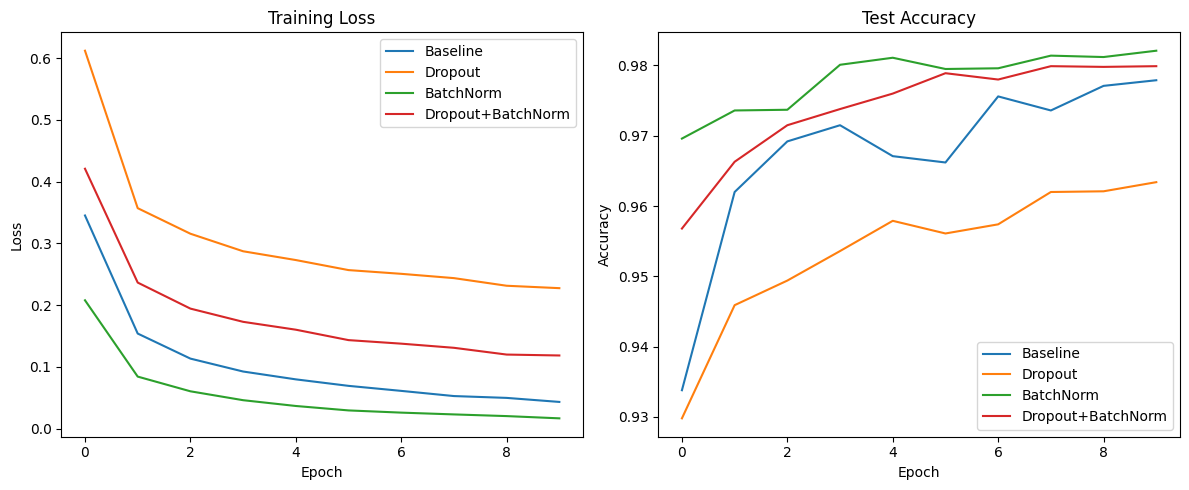

In [ ]:
# Install required packages
!pip install -q torch torchvision matplotlib

# Import required libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_data, batch_size=1000, shuffle=False)

# Define models
class BaselineNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.net(x)

class DropoutNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.net(x)

class BatchNormNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.net(x)

class DropoutBatchNormNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.net(x)

# Training and evaluation functions
def train(model, optimizer, criterion, loader):
    model.train()
    total_loss = 0
    correct = 0
    for x, y in loader:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        output = model(x)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        correct += (output.argmax(1) == y).sum().item()
    return total_loss / len(loader), correct / len(loader.dataset)

def evaluate(model, criterion, loader):
    model.eval()
    total_loss = 0
    correct = 0
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            output = model(x)
            loss = criterion(output, y)
            total_loss += loss.item()
            correct += (output.argmax(1) == y).sum().item()
    return total_loss / len(loader), correct / len(loader.dataset)

# Experiment settings
models = {
    "Baseline": BaselineNN().to(device),
    "Dropout": DropoutNN().to(device),
    "BatchNorm": BatchNormNN().to(device),
    "Dropout+BatchNorm": DropoutBatchNormNN().to(device)
}

num_epochs = 10
criterion = nn.CrossEntropyLoss()

results = {}

# Training loop
for name, model in models.items():
    print(f"\nTraining {name} model...")
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    train_losses, test_accuracies = [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, criterion, train_loader)
        test_loss, test_acc = evaluate(model, criterion, test_loader)
        train_losses.append(train_loss)
        test_accuracies.append(test_acc)
        print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f}, Test Accuracy: {test_acc:.4f}")

    results[name] = {
        "train_loss": train_losses,
        "test_accuracy": test_accuracies
    }

# Plotting results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for name in results:
    plt.plot(results[name]["train_loss"], label=name)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
for name in results:
    plt.plot(results[name]["test_accuracy"], label=name)
plt.title("Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


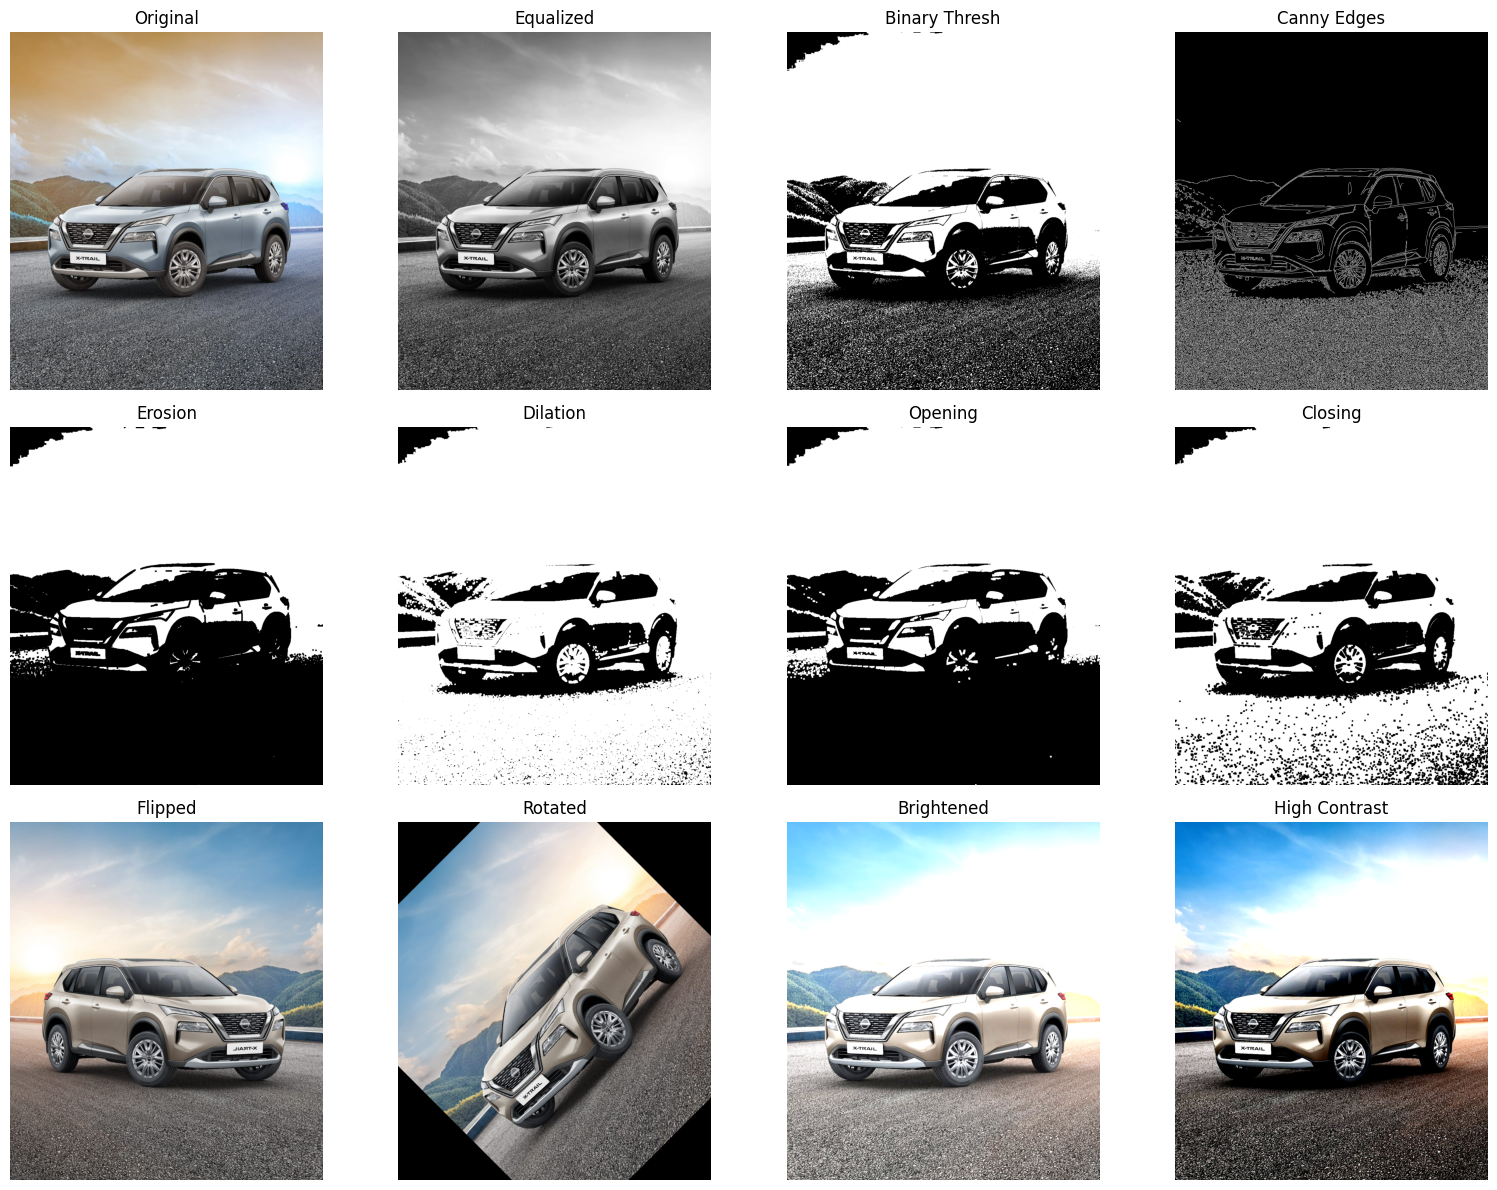

In [ ]:
# Install required packages
!pip install -q opencv-python-headless matplotlib pillow

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance

# Upload image
img = cv2.imread("/content/image.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# --------- PROCESSING ---------

# Histogram Equalization
equalized = cv2.equalizeHist(gray)

# Thresholding
_, binary_thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Edge Detection
edges = cv2.Canny(gray, 100, 200)

# Morphological operations
_, bin_img = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
kernel = np.ones((5, 5), np.uint8)
eroded = cv2.erode(bin_img, kernel, iterations=1)
dilated = cv2.dilate(bin_img, kernel, iterations=1)
opened = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN, kernel)
closed = cv2.morphologyEx(bin_img, cv2.MORPH_CLOSE, kernel)

# Data augmentation using Pillow
img_pil = Image.open("/content/image.jpg")
flipped = img_pil.transpose(Image.FLIP_LEFT_RIGHT)
rotated = img_pil.rotate(45)
bright_img = ImageEnhance.Brightness(img_pil).enhance(1.5)
contrast_img = ImageEnhance.Contrast(img_pil).enhance(2.0)

# --------- DISPLAY IN GRID ---------

# Convert Pillow images to numpy arrays
flipped_np = np.array(flipped)
rotated_np = np.array(rotated)
bright_np = np.array(bright_img)
contrast_np = np.array(contrast_img)

# Convert grayscale images to RGB for uniformity
def to_rgb(image):
    if len(image.shape) == 2:
        return cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    return image

# Image titles and data
titles = [
    "Original", "Equalized", "Binary Thresh",
    "Canny Edges", "Erosion", "Dilation", "Opening",
    "Closing", "Flipped", "Rotated", "Brightened", "High Contrast"
]

images = [
    to_rgb(img), to_rgb(equalized), to_rgb(binary_thresh),
    to_rgb(edges), to_rgb(eroded), to_rgb(dilated), to_rgb(opened),
    to_rgb(closed), flipped_np, rotated_np, bright_np, contrast_np
]

# Plot in a grid
n_cols = 4
n_rows = int(np.ceil(len(images) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 12))
axes = axes.flatten()

for i in range(len(images)):
    axes[i].imshow(images[i])
    axes[i].set_title(titles[i])
    axes[i].axis('off')

# Hide unused subplots
for j in range(len(images), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf

# Load and prepare data
data = pd.read_csv('Sonar.csv')
X = StandardScaler().fit_transform(data.drop('Class', axis=1))
y = LabelEncoder().fit_transform(data['Class'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and compile model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(60, activation='relu', input_dim=60),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train and evaluate model
model.fit(X_train, y_train, epochs=50, validation_split=0.1)
print("Test Accuracy:", model.evaluate(X_test, y_test)[1])


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.4183 - loss: 0.9279 - val_accuracy: 0.5882 - val_loss: 0.6983
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5102 - loss: 0.8093 - val_accuracy: 0.6471 - val_loss: 0.6706
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5401 - loss: 0.7774 - val_accuracy: 0.6471 - val_loss: 0.6560
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5512 - loss: 0.7721 - val_accuracy: 0.6471 - val_loss: 0.6461
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5776 - loss: 0.7572 - val_accuracy: 0.7059 - val_loss: 0.6356
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6791 - loss: 0.6524 - val_accuracy: 0.7059 - val_loss: 0.6267
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5837 - loss: 0.6871 - val_accuracy: 0.7059 - val_loss: 0.6210
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6760 - loss: 0.5885 - val_accuracy: 0.7647 - val_loss: 0.6151
Epoch 9/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


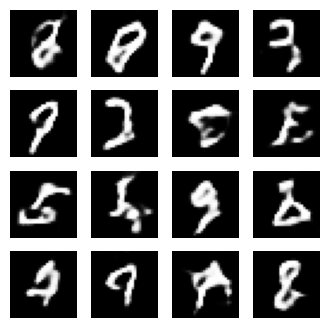

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import matplotlib.pyplot as plt
import numpy as np

def make_generator():
    return Sequential([
        layers.Dense(7*7*256, use_bias=False, input_shape=(100,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Reshape((7, 7, 256)),
        layers.Conv2DTranspose(128, 5, strides=1, padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Conv2DTranspose(64, 5, strides=2, padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Conv2DTranspose(1, 5, strides=2, padding='same', use_bias=False, activation='tanh')
    ])

def make_discriminator():
    return Sequential([
        layers.Conv2D(64, 5, strides=2, padding='same', input_shape=(28, 28, 1)),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        layers.Conv2D(128, 5, strides=2, padding='same'),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        layers.Flatten(),
        layers.Dense(1)
    ])

generator = make_generator()
discriminator = make_discriminator()

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
gen_opt = tf.keras.optimizers.Adam(1e-4)
disc_opt = tf.keras.optimizers.Adam(1e-4)

@tf.function
def train_step(images, batch_size=32):
    noise = tf.random.normal([batch_size, 100])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)
        gen_loss = cross_entropy(tf.ones_like(fake_output), fake_output)
        disc_loss = cross_entropy(tf.ones_like(real_output), real_output) + cross_entropy(tf.zeros_like(fake_output), fake_output)
    generator_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
    discriminator_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    gen_opt.apply_gradients(zip(generator_gradients, generator.trainable_variables))
    disc_opt.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))

# Load and preprocess the MNIST dataset
(train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize to [-1, 1]

batch_size = 256
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(60000).batch(batch_size)

# Training loop
epochs = 50
num_examples_to_generate = 16
seed = tf.random.normal([num_examples_to_generate, 100])

def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow((predictions[i, :, :, 0] + 1) / 2, cmap='gray')
        plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

for epoch in range(epochs):
    for image_batch in train_dataset:
        train_step(image_batch)



generate_and_save_images(generator, epochs, seed)


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load a small sample text corpus (replace with your own)
corpus = [
    "Hello, how are you?",
    "I am doing well.",
    "What's your name?",
    "My name is ChatBot.",
    "How can I help you?",
    "Tell me a joke.",
    "Why did the chicken cross the road?",
    "To get to the other side."
]

# Tokenization and Vocabulary Creation
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for padding token
word_index = tokenizer.word_index

# Set model parameters
embedding_dim = 128
lstm_units = 64
max_length = 10  # Adjust based on your corpus

# Prepare training data
sequences = tokenizer.texts_to_sequences(corpus)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')

# Split data into input and target sequences
input_sequences = padded_sequences[:, :-1]
target_sequences = padded_sequences[:, 1:]

# Model Definition
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length-1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_units, return_sequences=True)),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(vocab_size, activation='softmax'))
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Reshape target data to match output shape of the model
target_sequences = target_sequences.reshape((target_sequences.shape[0], target_sequences.shape[1], 1))

# Train the model (adjust epochs based on your data)
model.fit(input_sequences, target_sequences, epochs=200)

def generate_response(input_query, max_length=10):
    input_sequence = tokenizer.texts_to_sequences([input_query])[0]
    input_sequence = pad_sequences([input_sequence], maxlen=max_length-1, padding='pre')

    predicted_sequence = model.predict(input_sequence)
    predicted_words = [np.argmax(predicted_sequence[0][i]) for i in range(predicted_sequence.shape[1])]
    response = tokenizer.sequences_to_texts([predicted_words])[0]
    return response

# Example interaction
user_query = "Hello, how are you?"
response = generate_response(user_query)
print(f"User: {user_query}")
print(f"ChatBot: {response}")


Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.0000e+00 - loss: 3.4249
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4861 - loss: 3.3879
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4861 - loss: 3.3491
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.4861 - loss: 3.3070
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4861 - loss: 3.2602
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4861 - loss: 3.2073
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.4861 - loss: 3.1472
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.4861 - loss: 3.0783
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4861 - loss: 2.9993
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4861 - loss: 2.9091
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4861 - loss: 2.8068
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4861 - loss: 2.6928
E

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

# Load IMDB dataset (using top 5000 most frequent words)
vocab_size = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to have the same length
max_len = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

# Build GRU model
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, 128),
    tf.keras.layers.GRU(128),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=64)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Accuracy:", accuracy)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.6517 - loss: 0.6203
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.8447 - loss: 0.3566
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9087 - loss: 0.2326
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9392 - loss: 0.1636
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9602 - loss: 0.1176
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8815 - loss: 0.3299
Accuracy: 0.8859599828720093


In [ ]:

import torch
from transformers import T5ForConditionalGeneration, T5Tokenizer

model_name = "t5-small"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

def summarize_text(text, max_length=50):
    input_text = "summarize: " + text
    input_ids = tokenizer.encode(input_text, return_tensors="pt", add_special_tokens=True)
    output_ids = model.generate(input_ids=input_ids, max_length=max_length, num_beams=4, no_repeat_ngram_size=2)
    summary = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    return summary

text = """
Without strong security rules, anyone who has the address of your database can read / write to it, leaving your data vulnerable to attackers stealing, modifying, or deleting data as well as creating costly operations.
"""

summary = summarize_text(text)
print(summary)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

anyone who has the address of your database can read / write to it, leaving your data vulnerable to attackers stealing, modifying, or deleting data.
